In [6]:
import pdal

/Users/adam/anaconda3/envs/pdal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import shapely
import json
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [8]:
%matplotlib inline

In [9]:
workingfile = "../../sample-data/T_316000_235500.laz"

In [33]:
pipelineJson = {
  "pipeline": [ workingfile,
    {
        "type":"filters.mortonorder",
        "reverse":"true"
    },
    {   "type":"filters.normal",
        "knn":8
    }
  ]
}

In [34]:
pipeline = pdal.Pipeline(json.dumps(pipelineJson))
pipeline.validate() # check if our JSON and options were good
pipeline.loglevel = 8 #really noisy
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [35]:
# Load Pipeline output in python objects
arr = pipeline.arrays[0]
description = arr.dtype.descr
cols = [col for col, __ in description]
df = pd.DataFrame({col: arr[col] for col in cols})

In [36]:
df

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,UserData,PointSourceId,GpsTime,NormalX,NormalY,NormalZ,Curvature
0,316030.431,235500.003,15.866,26,4,4,1,0,2,29.0,0,21,394503.605232,0.040008,0.033863,0.998625,0.002497
1,316030.357,235500.188,15.848,47,3,3,1,0,2,30.0,0,21,394503.605235,0.048891,0.054420,0.997320,0.003210
2,316030.192,235500.044,15.850,39,2,2,1,1,2,30.0,0,21,394503.614611,0.084482,0.048794,0.995230,0.002314
3,316301.870,235500.099,14.999,224,1,1,1,0,2,-5.0,0,21,394493.027207,-0.013694,0.040985,0.999066,0.001165
4,316301.947,235500.098,14.990,295,1,1,1,0,2,11.0,0,22,394798.492154,-0.033855,0.073651,0.996709,0.002571
5,316301.878,235500.217,14.984,259,1,1,1,0,2,11.0,0,22,394798.492156,-0.293341,0.297016,0.908698,0.032554
6,316301.905,235729.416,14.536,109,1,1,1,0,2,23.0,0,21,394489.026147,-0.475660,0.121709,0.871168,0.000639
7,316301.823,235729.571,14.494,117,1,1,1,0,2,23.0,0,21,394489.026149,-0.478856,0.137069,0.867127,0.000791
8,316302.041,235614.824,27.125,168,1,4,1,0,4,11.0,0,21,394491.163835,0.215885,0.000088,0.976419,0.072870
9,316302.011,235614.731,23.274,33,3,3,1,0,4,11.0,0,21,394491.173195,0.630126,-0.212990,0.746710,0.069436


(316007.6907, 316502.7193, 235480.99385, 235899.12915)

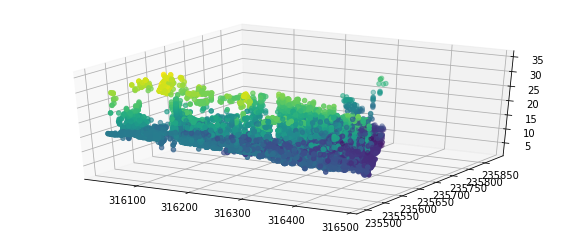

In [37]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(df.X[0:10000], df.Y[0:10000], df.Z[0:10000], c=df.Z[0:10000])
ax.axis('tight')

In [38]:
X,Y,Z = np.meshgrid(df.X[0:1000], df.Y[0:1000], df.Z[0:1000])


In [39]:
voxels = [X , Y , Z]

In [13]:
colors = np.empty(voxels.shape, dtype=object)
colors[:] = 'gray'
colors.shape

AttributeError: 'list' object has no attribute 'shape'

ValueError: Argument filled must be 3-dimensional

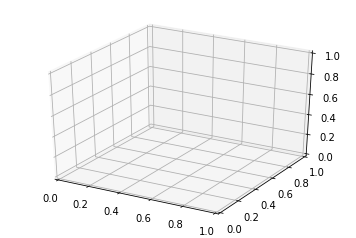

In [94]:
# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k' )


plt.show()